In [465]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [466]:
# Loading Data
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [467]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [468]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [469]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [470]:
missing = train.isnull().sum().sort_values(ascending=False)
percents = round(train.isnull().sum()/train.isnull().count()*100,1).sort_values(ascending=False)
missing_df = pd.concat([missing,percents], axis = 1, keys = ['Missing', '%'])
missing_df.head()

,Missing,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


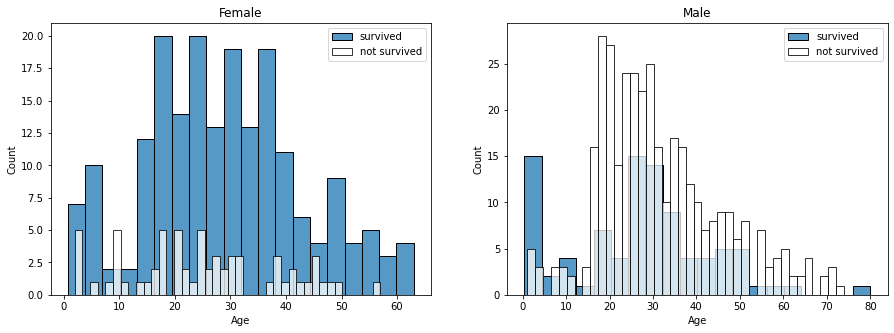

In [471]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 5))
female = train[train['Sex']=='female']
male = train[train['Sex']=='male']
ax = sns.histplot(female[female['Survived']==1].Age.dropna(), bins=20, label = survived, ax = axes[0], kde =False)
ax = sns.histplot(female[female['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], color='white', kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.histplot(male[male['Survived']==1].Age.dropna(), bins=20, label = survived, ax = axes[1], kde = False)
ax = sns.histplot(male[male['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], color='white', kde = False)
ax.legend()
_ = ax.set_title('Male')

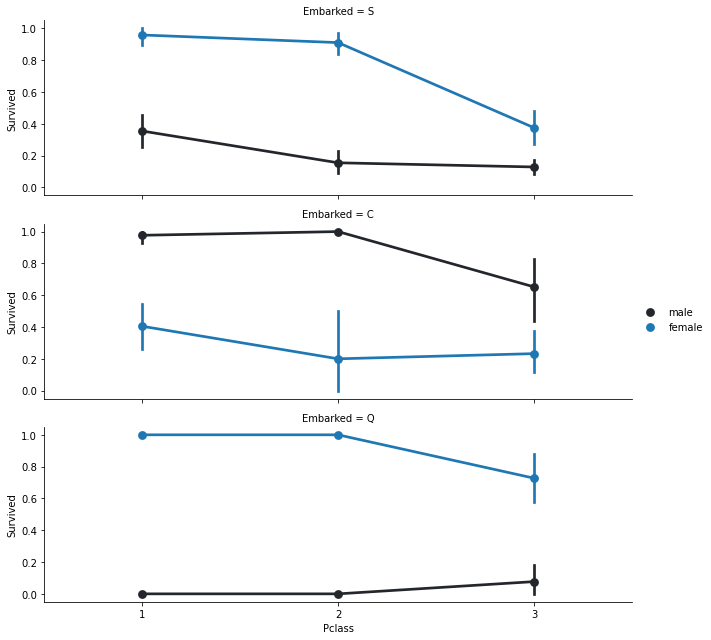

In [472]:
FacetGrid = sns.FacetGrid(train, row='Embarked', height=3, aspect=3)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', order=None, hue_order=None )
FacetGrid.add_legend()

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

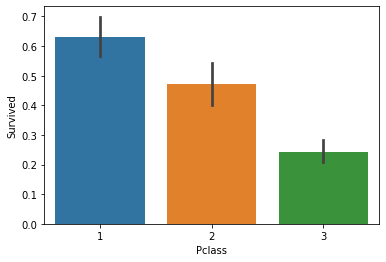

In [473]:
sns.barplot(x='Pclass', y='Survived', data=train)

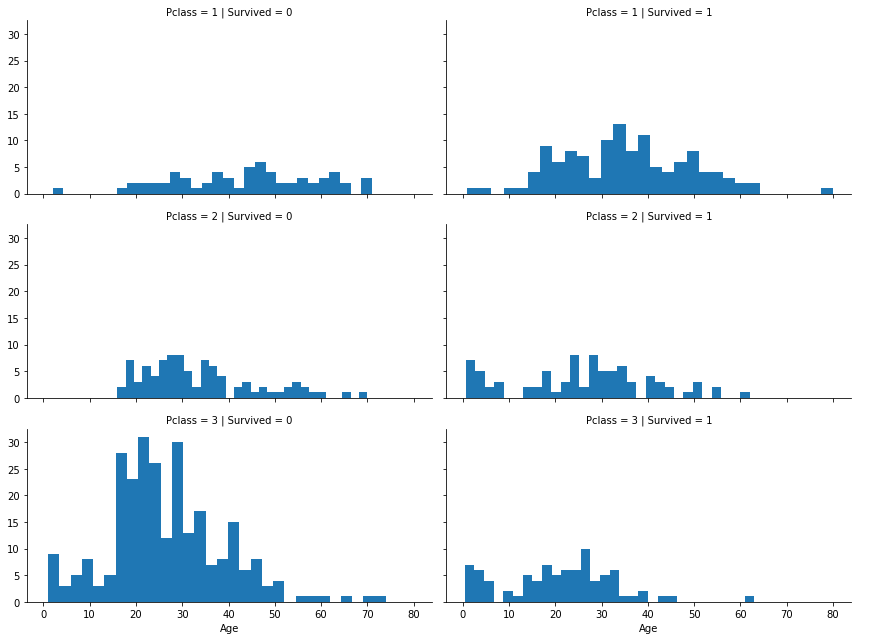

In [474]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', height=3, aspect=2)
grid.map(plt.hist, 'Age', bins=30)
grid.add_legend();

In [475]:
data = [train, test]
for dataset in data:
    dataset['FamilyCount'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['FamilyCount'] > 0, 'Alone'] = 0
    dataset.loc[dataset['FamilyCount'] == 0, 'Alone'] = 1
    dataset['Alone'] = dataset['Alone'].astype(int)

In [476]:
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,0


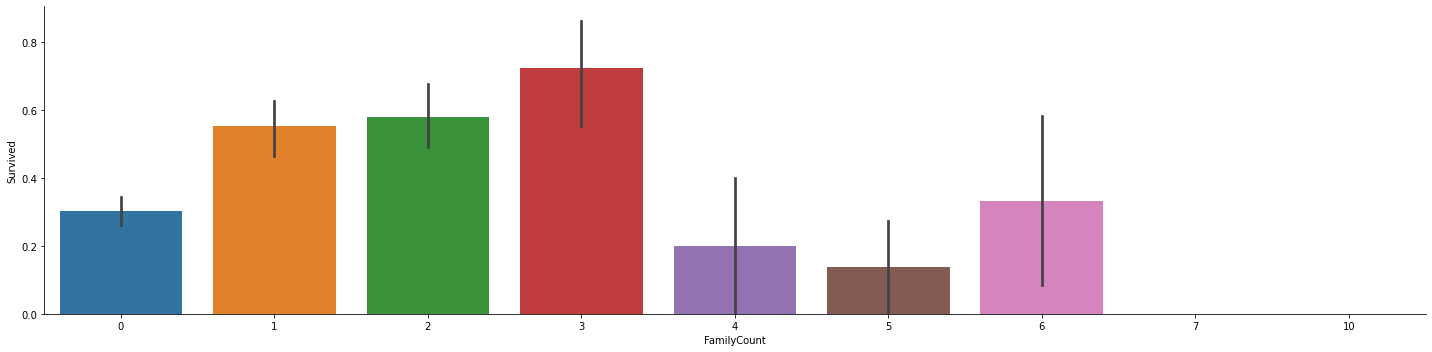

In [477]:
sns.catplot(x ='FamilyCount', y = 'Survived', data = train, kind ="bar", aspect = 4)

In [478]:
# Data Preparation

In [479]:
train = train.drop(['PassengerId', 'Ticket', 'Name'], axis = 1)
test = test. drop(['Ticket', 'Name'], axis = 1)

In [480]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 0}
data = [train, test]
for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)

In [481]:
data = [train, test]
for dataset in data:
    mean = train["Age"].mean()
    std = test["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train["Age"].astype(int)
train["Age"].isnull().sum()

0

In [482]:
train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [483]:
data = [train, test]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Sex'] = dataset['Sex'].map({'female':0,'male':1})

In [484]:
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilyCount,Alone,Deck
0,0,3,1,22,1,0,7.2500,0,1,0,0
1,1,1,0,38,1,0,71.2833,1,1,0,3
2,1,3,0,26,0,0,7.9250,0,0,1,0
3,1,1,0,35,1,0,53.1000,0,1,0,3
4,0,3,1,35,0,0,8.0500,0,0,1,0
5,0,3,1,17,0,0,8.4583,2,0,1,0
6,0,1,1,54,0,0,51.8625,0,0,1,5
7,0,3,1,2,3,1,21.0750,0,4,0,0
8,1,3,0,27,0,2,11.1333,0,2,0,0
9,1,2,0,14,1,0,30.0708,1,1,0,0


In [485]:
data = [train, test]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['FamilyCount']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

In [486]:
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilyCount,Alone,Deck,Age_Class,Fare_Per_Person
0,0,3,1,2,1,0,0,0,1,0,0,6,0
1,1,1,0,5,1,0,3,1,1,0,3,5,1
2,1,3,0,3,0,0,1,0,0,1,0,9,1
3,1,1,0,5,1,0,3,0,1,0,3,5,1
4,0,3,1,5,0,0,1,0,0,1,0,15,1
5,0,3,1,1,0,0,1,2,0,1,0,3,1
6,0,1,1,6,0,0,3,0,0,1,5,6,3
7,0,3,1,0,3,1,2,0,4,0,0,0,0
8,1,3,0,3,0,2,1,0,2,0,0,9,0
9,1,2,0,1,1,0,2,1,1,0,0,2,1


In [487]:
# Building the Models

In [490]:
X_train = train.drop("Survived", axis =1)
Y_train = train["Survived"]
X_test = test.drop("PassengerId", axis = 1).copy()

In [491]:
# Stochastic Gradient Descent
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

In [492]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [493]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

In [494]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

In [495]:
# Gaussian Naive Bayes
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [497]:
# Perceptron
perceptron = Perceptron(max_iter=10)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

In [504]:
# LSVM
linear_svc = LinearSVC(max_iter=100000)
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

In [505]:
# Decision Tree
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test) 
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [506]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
92.26,Random Forest
92.26,Decision Tree
83.28,KNN
80.81,Support Vector Machines
80.70,Logistic Regression
78.34,Perceptron
77.44,Naive Bayes
69.14,Stochastic Gradient Decent


In [507]:
# Importances

In [509]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Sex,0.305
Age_Class,0.105
Deck,0.092
Age,0.090
Pclass,0.086
Fare,0.078
Embarked,0.060
FamilyCount,0.059
Fare_Per_Person,0.044


<AxesSubplot:xlabel='feature'>

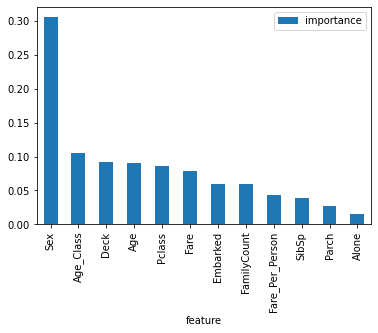

In [510]:
importances.plot.bar()

In [511]:
train  = train.drop("Alone", axis=1)
test  = test.drop("Alone", axis=1)

train  = train.drop("Parch", axis=1)
test  = test.drop("Parch", axis=1)

In [512]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

92.26 %


D:\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


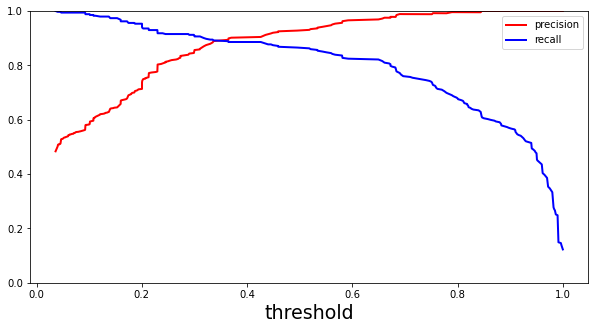

In [521]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=2)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=2)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=10)
    plt.ylim([0, 1])

plt.figure(figsize=(10, 5))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

In [522]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9692875936045334


In [523]:
output = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': Y_prediction})
output.to_csv('submission.csv', index=False)